# Interpolación

Polinomios de Newton y lagrange y splines cúbicos

In [19]:
## Importar librerías

import numpy as np
from scipy.interpolate import lagrange, CubicSpline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from numpy.polynomial import Polynomial


In [16]:
# Definir datos:
#Perfil NACA 2412 con Reynolds 1.4x10^6. Plain wing

x = np.array([0, 2, 4, 6, 8, 10, 12, 14], dtype=float) #ángulo de ataque
y = np.array([0.055267, 0.106835, 0.157834, 0.208649, 0.259063, 0.308118, 0.363966, 0.396394]) #coeficiente de sustentación
m = np.array([0.008662, 0.009767, 0.013217, 0.018343, 0.025261, 0.034375, 0.044691, 0.056393]) #coeficiente de drag
x_interpolate= 7.0

## Polinomios de Newton

### Coeficiente de sustentación

--- Polinomio de newton ---
El valor del polinomio en x = 7.0 es: 0.234180


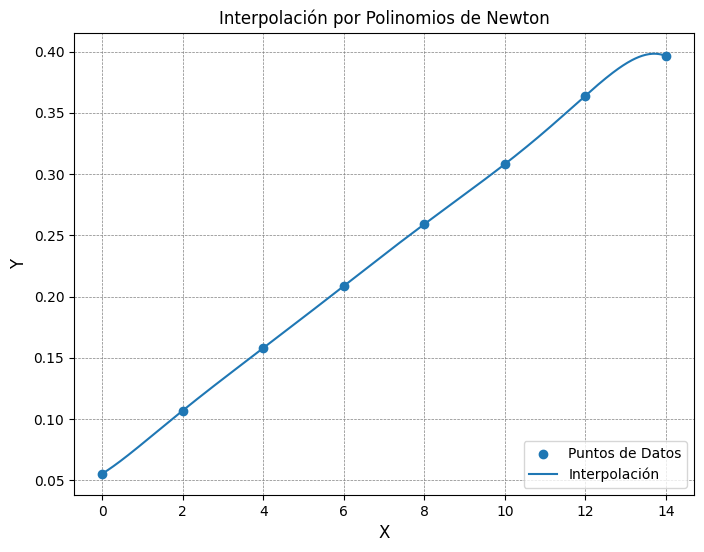

In [84]:
def calculate_newton_coeffs(x_data, y_data):
    """Calcula los coeficientes del polinomio de Newton usando diferencias divididas."""
    n = len(x_data)
    # Inicializar la tabla de diferencias divididas
    p = np.zeros([n, n])
    p[:, 0] = y_data  # primer columna es y_data

    # Iterar para calcular las diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            p[i, j] = (p[i + 1, j - 1] - p[i, j - 1]) / (x_data[i + j] - x_data[i])
            
    # Los coeficientes son la diagonal superior de la tabla
    return p[0]

def eval_newton_poly(coeffs, x_data, z):
    """Evalúa el polinomio de Newton en z"""
    n = len(coeffs) - 1
    results = []
    for val in z:
        p = coeffs[n]
        for i in range(n - 1, -1, -1):
            p = p * (val - x_data[i]) + coeffs[i]
        results.append(p)
    return results

# Calcular y graficar
print("--- Polinomio de newton ---")
newton_coeffs = calculate_newton_coeffs(x, y)
y_newton = eval_newton_poly(newton_coeffs, x, [x_interpolate])
print(f"El valor del polinomio en x = {x_interpolate} es: {y_newton[0]:.6f}")


x_list_newton = np.linspace(x.min(), x.max(), 500)
y_list_newton = eval_newton_poly(newton_coeffs, x, x_list_newton)

fig = figure(figsize=(8, 6))
plt.scatter(x, y, zorder=5)
plt.plot(x_list_newton, y_list_newton)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title("Interpolación por Polinomios de Newton")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(['Puntos de Datos', 'Interpolación'], loc="lower right")
plt.show()


### Coeficiente de drag

--- Polinomio de newton ---
El valor del polinomio en x = 7.0 es: 0.021532


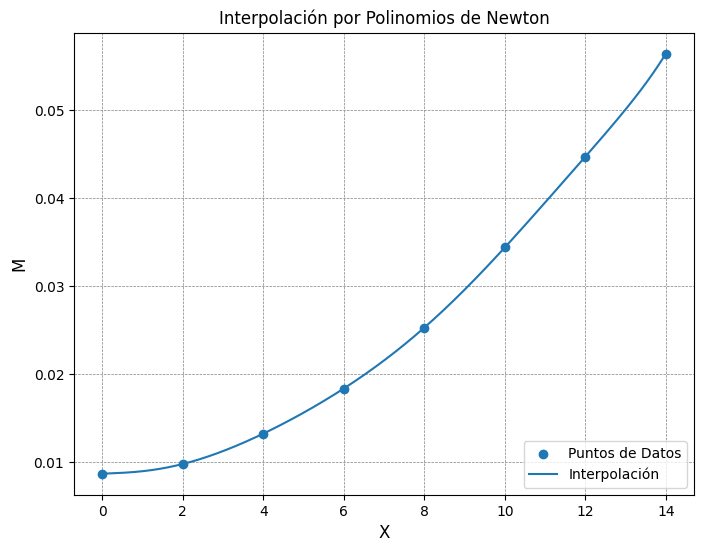

In [85]:
def calculate_newton_coeffs(x_data, y_data):
    """Calcula los coeficientes del polinomio de Newton usando diferencias divididas."""
    n = len(x_data)
    # Inicializar la tabla de diferencias divididas
    p = np.zeros([n, n])
    p[:, 0] = y_data  # primer columna es y_data

    # Iterar para calcular las diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            p[i, j] = (p[i + 1, j - 1] - p[i, j - 1]) / (x_data[i + j] - x_data[i])
            
    # Los coeficientes son la diagonal superior de la tabla
    return p[0]

def eval_newton_poly(coeffs, x_data, z):
    """Evalúa el polinomio de Newton en z"""
    n = len(coeffs) - 1
    results = []
    for val in z:
        p = coeffs[n]
        for i in range(n - 1, -1, -1):
            p = p * (val - x_data[i]) + coeffs[i]
        results.append(p)
    return results

# Calcular y graficar
print("--- Polinomio de newton ---")
newton_coeffs = calculate_newton_coeffs(x, m)
m_newton = eval_newton_poly(newton_coeffs, x, [x_interpolate])
print(f"El valor del polinomio en x = {x_interpolate} es: {m_newton[0]:.6f}")


x_list_newton = np.linspace(x.min(), x.max(), 500)
m_list_newton = eval_newton_poly(newton_coeffs, x, x_list_newton)

fig = figure(figsize=(8, 6))
plt.scatter(x, m, zorder=5)
plt.plot(x_list_newton, m_list_newton)
plt.xlabel('X', fontsize=12)
plt.ylabel('M', fontsize=12)
plt.title("Interpolación por Polinomios de Newton")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(['Puntos de Datos', 'Interpolación'], loc="lower right")
plt.show()


## Polinomios de Lagrange

### Coeficiente de sustentación

In [38]:
# Crea el polinomio de Lagrange
lagrange_poly = lagrange(x, y)

# Evaluar en x = 7
y_lagrange = lagrange_poly(x_interpolate)

print(f"\n--- Polinomio de Lagrange ---")
print(f"El valor interpolado en x = {x_interpolate} es y = {y_lagrange:.6f}")

#Debe ser el mismo polinomio que el de Newton


--- Polinomio de Lagrange ---
El valor interpolado en x = 7.0 es y = 0.234180


### Coeficiente de drag

In [70]:
# Crea el polinomio de Lagrange
lagrange_poly = lagrange(x, m)

# Evaluar en x = 7
m_lagrange = lagrange_poly(x_interpolate)

print(f"\n--- Polinomio de Lagrange ---")
print(f"El valor interpolado en x = {x_interpolate} es y = {m_lagrange:.6f}")

#Debe ser el mismo polinomio que el de Newton


--- Polinomio de Lagrange ---
El valor interpolado en x = 7.0 es y = 0.021532


## Splines cúbicos

### Coeficiente de sustentación


--- Splines cúbicos ---
El valor del spline en x = 7.0 es: 0.234262


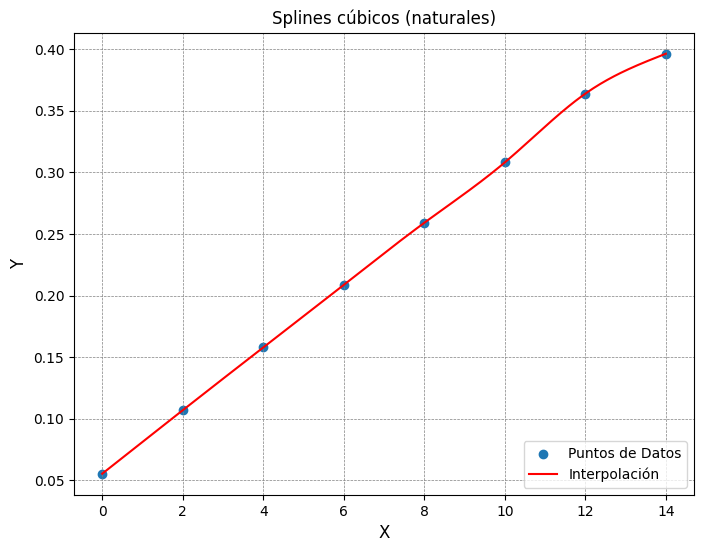

In [54]:
def solve_natural_spline_coeffs(x_data, y_data):
    #resuelve el sistema tridiagonal para las segundas derivadas (M)
    n = len(x_data)
    A = np.zeros((n, n))
    B = np.zeros(n)
    
    # Se define h_i = x_{i+1} - x_i
    h = x_data[1:] - x_data[:-1]
    
    # Condiciones de frontera de splines naturales: M_0 = 0 and M_{n-1} = 0
    # Solo se debe resolver para M_1 to M_{n-2}
    A[0, 0] = 1
    A[n - 1, n - 1] = 1

    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        B[i] = 6 * ((y_data[i + 1] - y_data[i]) / h[i] - (y_data[i] - y_data[i - 1]) / h[i - 1])

    # Resolver sistema A*M = B para M
    M = np.linalg.solve(A, B)
    return M

def eval_cubic_spline(x_data, y_data, M, z):
    #Evalúa el spline cúbico para una z 
    results = []
    h = x_data[1:] - x_data[:-1]

    for val in z:
        # Encuentra el intervalo [x_i, x_{i+1}] que contiene val
        # 'right' se asegura que si val es un nudo, obtenemos el intervalo a la izquierda
        i = np.searchsorted(x_data, val, side='right') - 1
        # caso donde val es el último punto
        if i == len(x_data) - 1:
            i -= 1

        # Fórmula de evaluación para S_i(x)
        term1 = M[i] * ((x_data[i + 1] - val)**3) / (6 * h[i])
        term2 = M[i + 1] * ((val - x_data[i])**3) / (6 * h[i])
        term3 = (y_data[i] - M[i] * (h[i]**2) / 6) * (x_data[i + 1] - val) / h[i]
        term4 = (y_data[i + 1] - M[i + 1] * (h[i]**2) / 6) * (val - x_data[i]) / h[i]
        
        results.append(term1 + term2 + term3 + term4)
        
    return results


print("\n--- Splines cúbicos ---")


spline_coeffs_M = solve_natural_spline_coeffs(x, y)
y_spline = eval_cubic_spline(x, y, spline_coeffs_M, [x_interpolate])
print(f"El valor del spline en x = {x_interpolate} es: {y_spline[0]:.6f}")


x_list_spline = np.linspace(x.min(), x.max(), 500)
y_list_spline = eval_cubic_spline(x, y, spline_coeffs_M, x_list_spline)

fig = figure(figsize=(8, 6))
plt.scatter(x, y, )
plt.plot(x_list_spline, y_list_spline, 'r-')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title("Splines cúbicos (naturales)")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(['Puntos de Datos', 'Interpolación'], loc="lower right")
plt.show()

In [56]:
# Usando SciPy para el spline cúbico natural
cs = CubicSpline(x, y, bc_type='natural')

# Evaluando
y_spline = cs(x_interpolate)

print(f"\n--- Spline cúbicos ---")
print(f"Valor del spline en x = {x_interpolate} es = {y_spline:.6f}")


--- Spline cúbicos ---
Valor del spline en x = 7.0 es = 0.234262


### Coeficiente de drag


--- Splines cúbicos ---
El valor del spline en x = 7.0 es: 0.021527


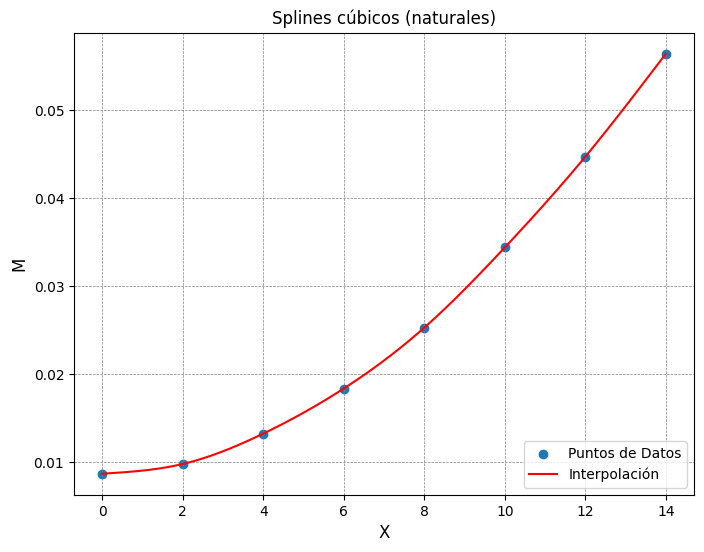

In [77]:
def solve_natural_spline_coeffs(x_data, y_data):
    #resuelve el sistema tridiagonal para las segundas derivadas (M)
    n = len(x_data)
    A = np.zeros((n, n))
    B = np.zeros(n)
    
    # Se define h_i = x_{i+1} - x_i
    h = x_data[1:] - x_data[:-1]
    
    # Condiciones de frontera de splines naturales: M_0 = 0 and M_{n-1} = 0
    # Solo se debe resolver para M_1 to M_{n-2}
    A[0, 0] = 1
    A[n - 1, n - 1] = 1

    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        B[i] = 6 * ((y_data[i + 1] - y_data[i]) / h[i] - (y_data[i] - y_data[i - 1]) / h[i - 1])

    # Resolver sistema A*M = B para M
    M = np.linalg.solve(A, B)
    return M

def eval_cubic_spline(x_data, y_data, M, z):
    #Evalúa el spline cúbico para una z 
    results = []
    h = x_data[1:] - x_data[:-1]

    for val in z:
        # Encuentra el intervalo [x_i, x_{i+1}] que contiene val
        # 'right' se asegura que si val es un nudo, obtenemos el intervalo a la izquierda
        i = np.searchsorted(x_data, val, side='right') - 1
        # caso donde val es el último punto
        if i == len(x_data) - 1:
            i -= 1

        # Fórmula de evaluación para S_i(x)
        term1 = M[i] * ((x_data[i + 1] - val)**3) / (6 * h[i])
        term2 = M[i + 1] * ((val - x_data[i])**3) / (6 * h[i])
        term3 = (y_data[i] - M[i] * (h[i]**2) / 6) * (x_data[i + 1] - val) / h[i]
        term4 = (y_data[i + 1] - M[i + 1] * (h[i]**2) / 6) * (val - x_data[i]) / h[i]
        
        results.append(term1 + term2 + term3 + term4)
        
    return results


print("\n--- Splines cúbicos ---")


spline_coeffs_M = solve_natural_spline_coeffs(x, m)
m_spline = eval_cubic_spline(x, m, spline_coeffs_M, [x_interpolate])
print(f"El valor del spline en x = {x_interpolate} es: {m_spline[0]:.6f}")


x_list_spline = np.linspace(x.min(), x.max(), 500)
m_list_spline = eval_cubic_spline(x, m, spline_coeffs_M, x_list_spline)

fig = figure(figsize=(8, 6))
plt.scatter(x, m, )
plt.plot(x_list_spline, m_list_spline, 'r-')
plt.xlabel('X', fontsize=12)
plt.ylabel('M', fontsize=12)
plt.title("Splines cúbicos (naturales)")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(['Puntos de Datos', 'Interpolación'], loc="lower right")
plt.show()

In [78]:
# Usando SciPy para el spline cúbico natural
cs = CubicSpline(x, m, bc_type='natural')

# Evaluando
m_spline = cs(x_interpolate)

print(f"\n--- Spline cúbicos ---")
print(f"Valor del spline en x = {x_interpolate} es = {m_spline:.6f}")


--- Spline cúbicos ---
Valor del spline en x = 7.0 es = 0.021527


### Comparación

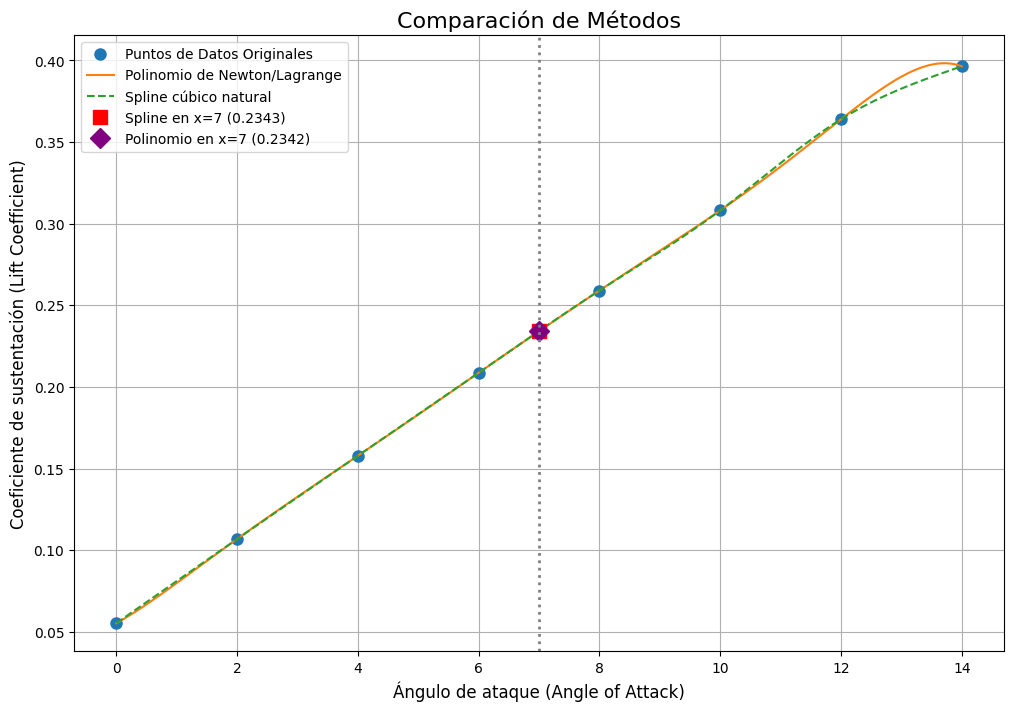

In [66]:
# crea un resumen de los resultados
x_smooth = np.linspace(x.min(), x.max(), 500)

# Evalúa cada método de interpolación en los valores x suaves
y_smooth_newton = newton_polynomial(newton_coeffs, x, x_smooth)
y_smooth_lagrange = lagrange_poly(x_smooth) # lagrange_poly ya es una función
y_smooth_spline = cs(x_smooth)             # cs también está como funcion


plt.figure(figsize=(12, 8))
plt.plot(x, y, 'o', markersize=8, label='Puntos de Datos Originales')


plt.plot(x_smooth, y_smooth_newton, label="Polinomio de Newton/Lagrange")
plt.plot(x_smooth, y_smooth_spline, '--', label="Spline cúbico natural")

# punto de interés x=7
plt.plot(x_interpolate, y_spline, 's', markersize=10, color='red', label=f'Spline en x=7 ({y_spline:.4f})')
plt.plot(x_interpolate, y_newton[0], 'D', markersize=10, color='purple', label=f'Polinomio en x=7 ({y_newton[0]:.4f})')
plt.axvline(x=x_interpolate, color='gray', linestyle=':', linewidth=2)

plt.title('Comparación de Métodos', fontsize=16)
plt.xlabel('Ángulo de ataque (Angle of Attack)', fontsize=12)
plt.ylabel('Coeficiente de sustentación (Lift Coefficient)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

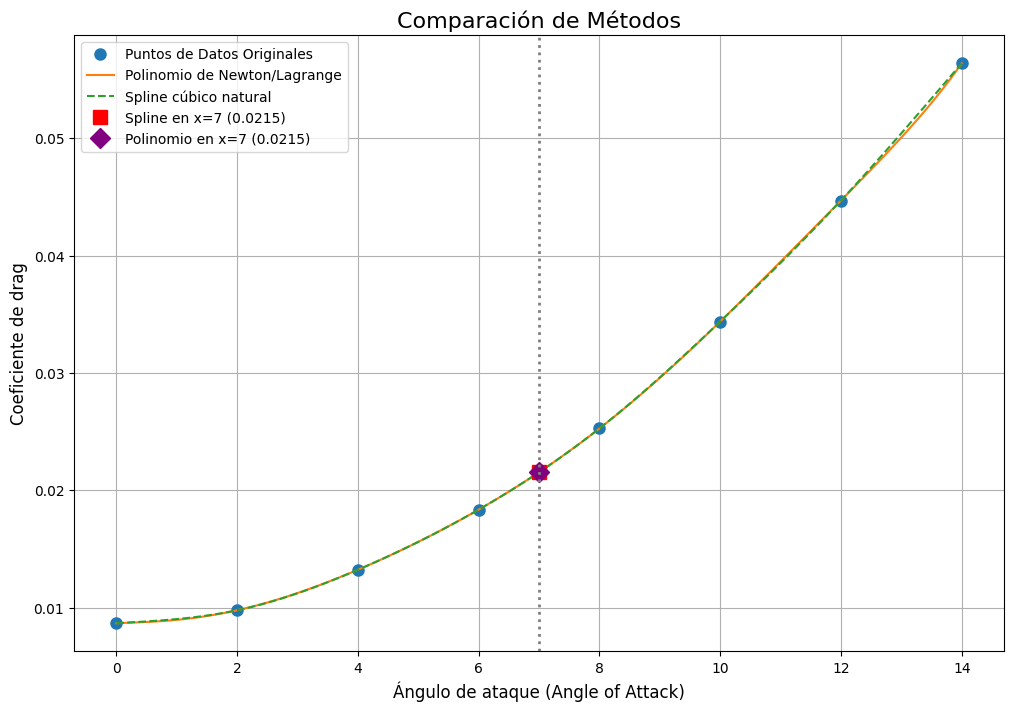

In [92]:
# crea un resumen de los resultados
x_smooth = np.linspace(x.min(), x.max(), 500)

# Evalúa cada método de interpolación en los valores x suaves
m_smooth_newton = newton_polynomial(newton_coeffs, x, x_smooth)
m_smooth_lagrange = lagrange_poly(x_smooth) # lagrange_poly ya es una función
m_smooth_spline = cs(x_smooth)             # cs también está como funcion


plt.figure(figsize=(12, 8))
plt.plot(x, m, 'o', markersize=8, label='Puntos de Datos Originales')


plt.plot(x_smooth, m_smooth_newton, label="Polinomio de Newton/Lagrange")
plt.plot(x_smooth, m_smooth_spline, '--', label="Spline cúbico natural")

# punto de interés x=7
plt.plot(x_interpolate, m_spline, 's', markersize=10, color='red', label=f'Spline en x=7 ({m_spline:.4f})')
plt.plot(x_interpolate, m_newton[0], 'D', markersize=10, color='purple', label=f'Polinomio en x=7 ({m_newton[0]:.4f})')
plt.axvline(x=x_interpolate, color='gray', linestyle=':', linewidth=2)

plt.title('Comparación de Métodos', fontsize=16)
plt.xlabel('Ángulo de ataque (Angle of Attack)', fontsize=12)
plt.ylabel('Coeficiente de drag', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# --- resumen para x = 7 ---
print("\n--- Resumen de interpolaciones para x = 7 ---")
print(f"Polinomio de Newton y= {y_newton[0]:.6f}, m={m_newton[0]:.6f}")
print(f"Polinomio de lagrange y = {y_lagrange:.6f}, m={m_lagrange:.6f} ")
print(f"Splines cúbicos naturales: y = {y_spline:.6f}, m={m_spline:.6f}")


--- Resumen de interpolaciones para x = 7 ---
Polinomio de Newton y= 0.234180, m=0.021532
Polinomio de lagrange y = 0.234180, m=0.021532 
Splines cúbicos naturales: y = 0.234262, m=0.021527


## Resultados

## Interpretación numérica
- Numéricamente se destaca una muy alta concordancia entre los dos tipos de interpolación. Para el coeficiente de sustentación en promedio es de un 0.035% mientras que para el coeficiente de drag la diferencia entre métodos es de 0.023%

- Esto se debe a que los datos describen una curva suave y sin cambios muy bruscos (cosa que se busca al diseñar un perfil alar). Además, el punto seleccionado para la interpolación (x=7) es muy centrado dentro del rango de datos [0,14]. Se sabe que la interpolación es más precisa y estable en el centro del dominio que en los extremos.

- Aunque ambos métodos (Newton/Lagrange) y splines ceubicos den resultados muy similares y confiables, los polinomios de Newton/Lagrange pueden tender a oscilar entre los puntos mientras que los splines cúbicos producen varios polinomios de menor grado que se unen con cada punto, resultando en un mejor comportamiento de sistemas físicos.

## Interpretación Aerodinámica
- El coeficiente de sustentacieon representa la capacidad del perfil alar para generar sustentación a determinado ángulo de ataque (AOA). A medida que el AOA aumente, el coeficiente de sustentación también lo hace de forma aproximadamente lineal, como se reflejan en los datos.

- El coeficiente de drag es el "costo" aerodinámico por generar dicha sustentación, representando la resistencia del perfil a medida que avanza a través del aire.

Ambos factores y coeficientes dependen de muchos otros factores tanto propios como externos.

- Llevando los resultados obtenidos para calcular la eficiencia aerodinámica (L/D), se tiene que: L/D=C_L/C_D = 0.234262/0.021527 ≈ 10.88.
Lo que significa que a este eangulo de ataque, el ala genera 10.88 unidades de fuerza de sustentación por cada unidad de fuerza de arrastre. Esto es una medidad directa de la eficiencia del perfil. Entre más alto sea el L/D, mejor será el planeo y habrá un menor consumo de combustible. Para un perfil NACA 2412, el L/D máximo suele estar cera de los 15-17 a ángulos de ataque menores